In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Preprocessing for model fitting
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, KFold

# ML models
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
import xgboost as xgb

# Model assessment
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_squared_log_error
from sklearn.pipeline import Pipeline
from scipy import stats


In [2]:
file_path= pd.read_csv("C:/Users/houer/Downloads/dataset_yield/yield_df.csv")
file_path

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [5]:
# Charger vos données
def load_data(file_path):
    df = pd.read_csv(file_path)
    print("Données chargées. Shape:", df.shape)
    return df

In [121]:
df = pd.read_csv("C:/Users/houer/Downloads/dataset_yield/yield_df.csv")
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# 1. EDA

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [70]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [122]:
df.duplicated().sum()

0

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


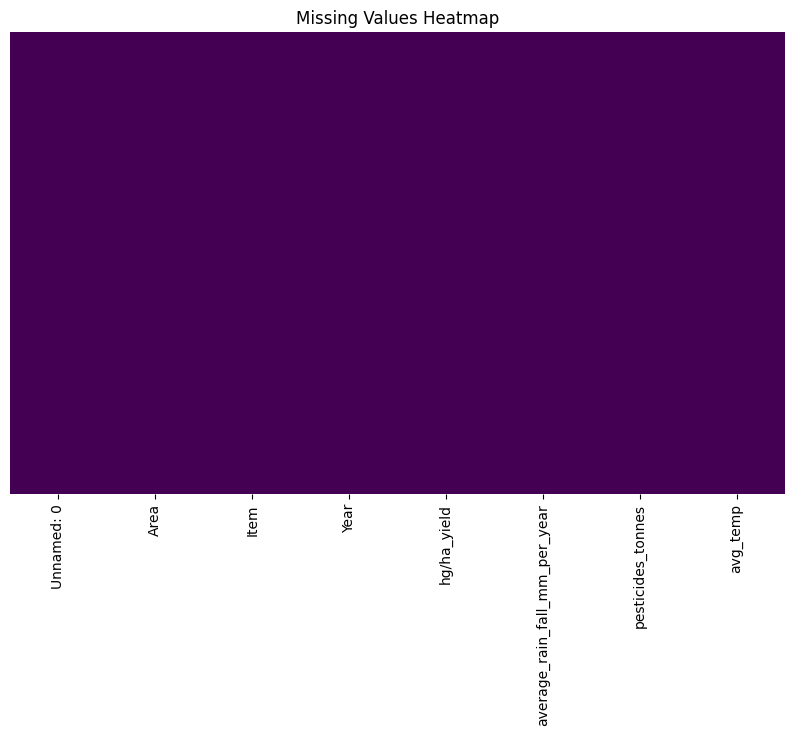

In [55]:
print(df.isnull().sum())


plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

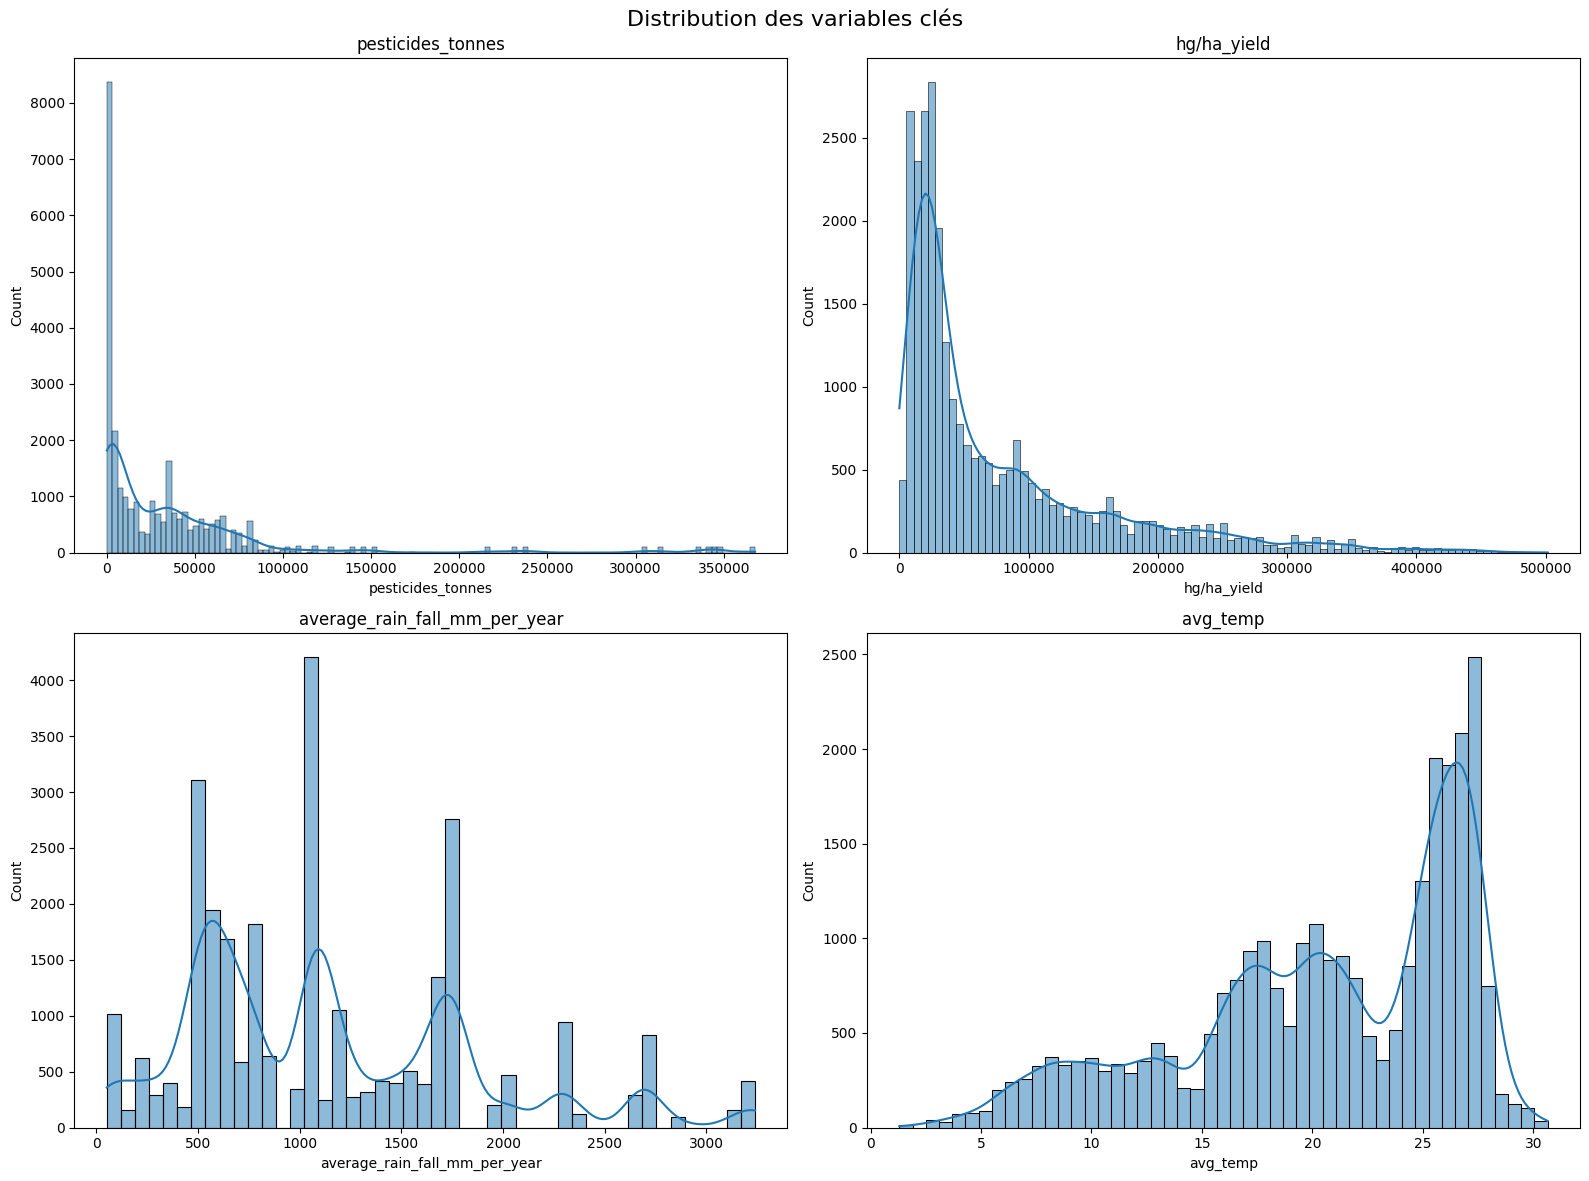

In [56]:
variables = ['pesticides_tonnes', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'avg_temp']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Key variables ditribition', fontsize=16)

for i, var in enumerate(variables):
    sns.histplot(df[var], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(var)

plt.tight_layout()
plt.show()

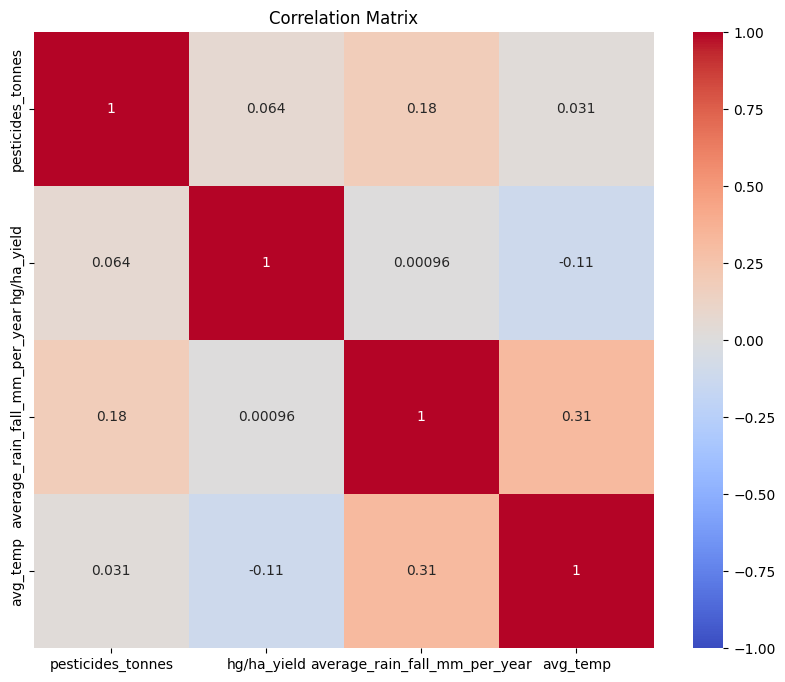

In [57]:
correlation = df[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

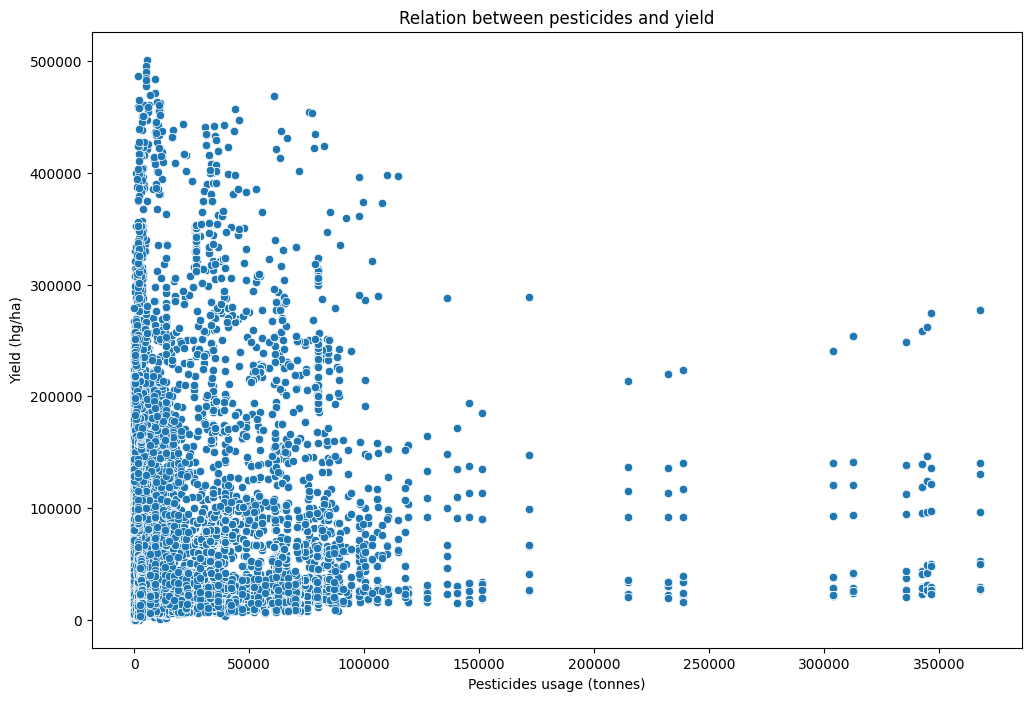

In [59]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='pesticides_tonnes', y='hg/ha_yield')
plt.title('Relation between pesticides and yield')
plt.xlabel('Pesticides usage (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.show()

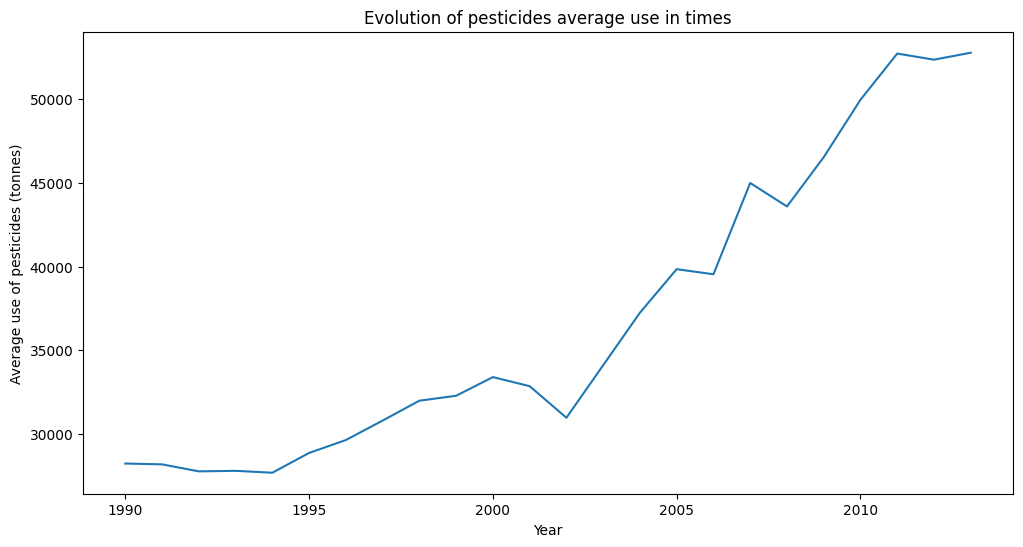

In [61]:
yearly_pesticide_use = df.groupby('Year')['pesticides_tonnes'].mean()

plt.figure(figsize=(12, 6))
yearly_pesticide_use.plot()
plt.title('Evolution of pesticides average use in times')
plt.xlabel('Year')
plt.ylabel('Average use of pesticides (tonnes)')
plt.show()

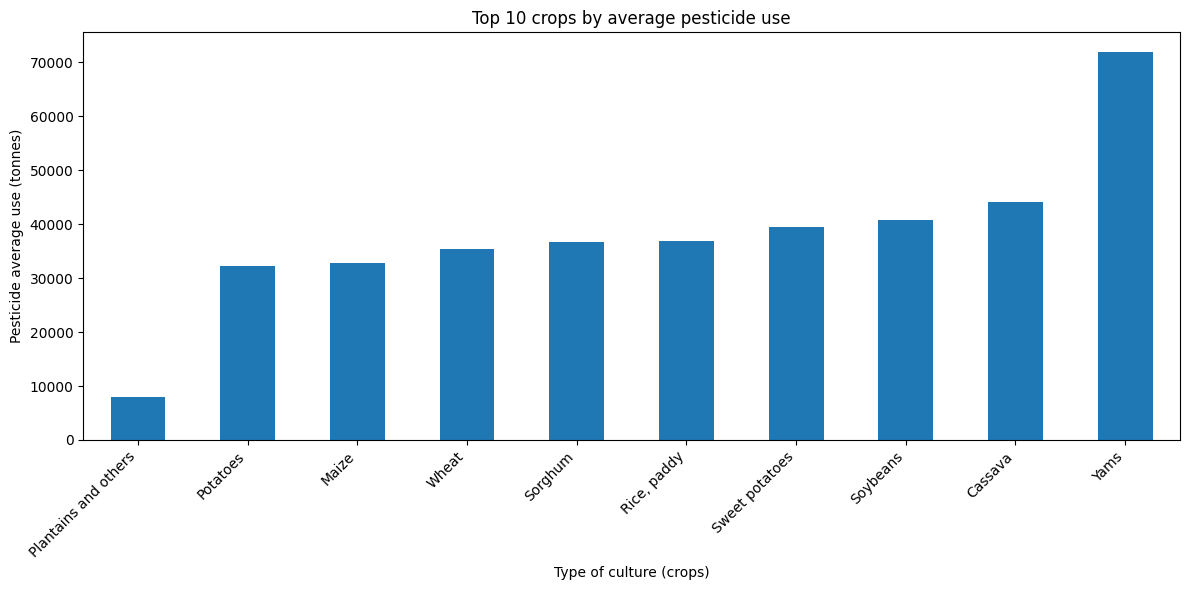

In [64]:
crop_pesticide_use = df.groupby('Item')['pesticides_tonnes'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 6))
crop_pesticide_use.plot(kind='bar')
plt.title('Top 10 crops by average pesticide use')
plt.xlabel('Type of culture (crops)')
plt.ylabel('Pesticide average use (tonnes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

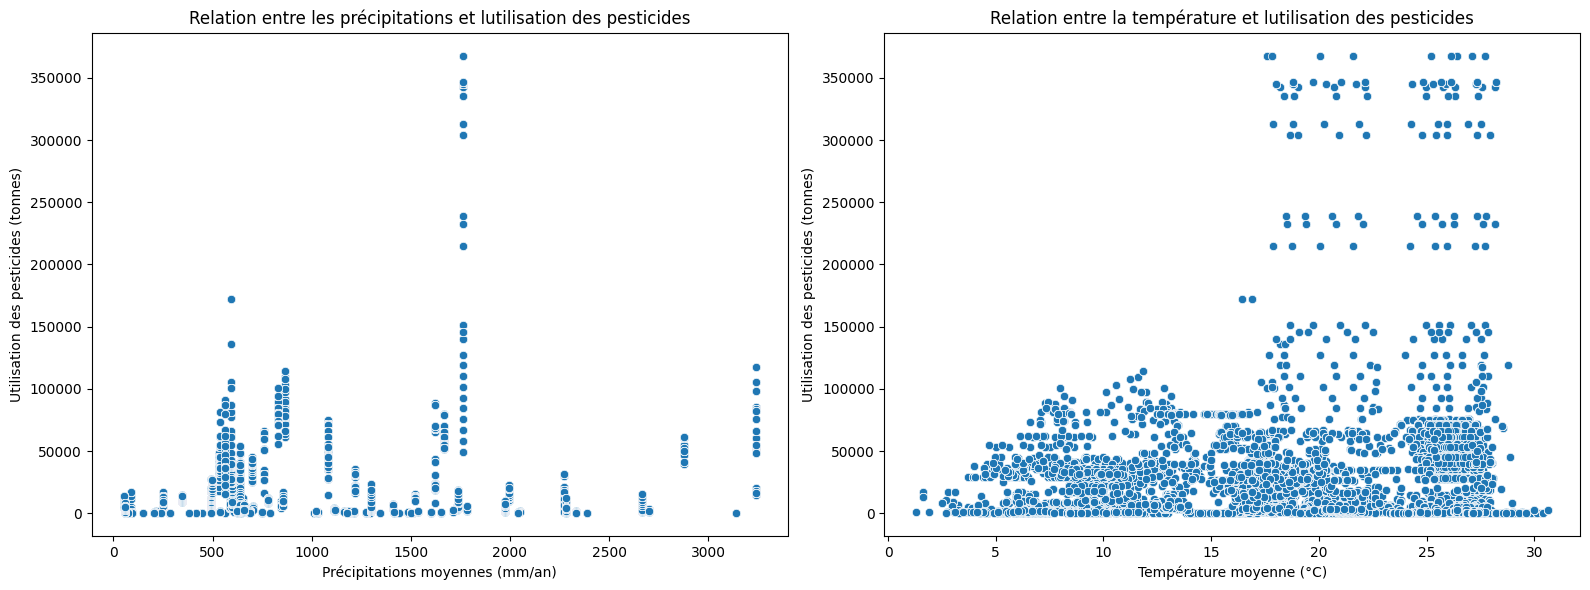

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='pesticides_tonnes', ax=axes[0])
axes[0].set_title('Relation entre les précipitations et lutilisation des pesticides')
axes[0].set_xlabel('Précipitations moyennes (mm/an)')
axes[0].set_ylabel('Utilisation des pesticides (tonnes)')

sns.scatterplot(data=df, x='avg_temp', y='pesticides_tonnes', ax=axes[1])
axes[1].set_title('Relation entre la température et lutilisation des pesticides')
axes[1].set_xlabel('Température moyenne (°C)')
axes[1].set_ylabel('Utilisation des pesticides (tonnes)')

plt.tight_layout()
plt.show()